In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

%matplotlib inline

In [2]:
style.use('ggplot')

In [3]:
df = pd.read_csv('tesla.csv',index_col=0,parse_dates=True)  # setting date as the index column
df.head()

,Symbol,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,TSLA,311.35,311.3500,311.35,311.35,0
2018-01-02,TSLA,320.53,322.1099,311.00,312.00,4352241
2018-01-03,TSLA,317.25,325.2500,315.55,321.00,4521527
2018-01-04,TSLA,314.62,318.5500,305.68,312.87,9946304
2018-01-05,TSLA,316.58,317.2400,312.00,316.62,4591180


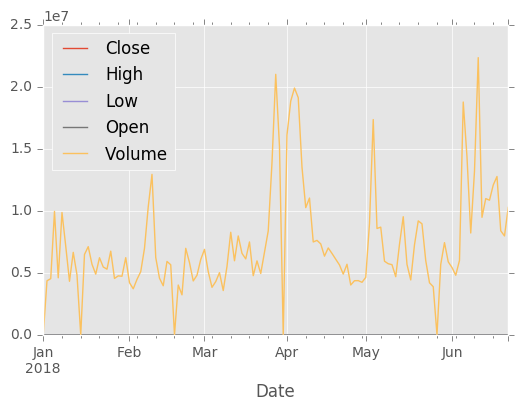

In [4]:
df.plot()

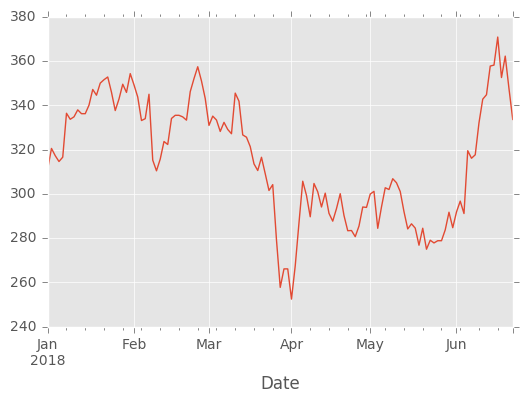

In [5]:
# To plot a apecific parameter
df['Close'].plot()

In [8]:
# now calculating the rolling mean
###df["rol_mean"]= pd.rolling_mean(df['High'],100)      # here the window is 100 and it is deprecated due to the old version
df['rol_mean'] = df['High'].rolling(100).mean()

In [9]:
df.head()

,Symbol,Close,High,Low,Open,Volume,rol_mean
Date,,,,,,,
2018-01-01,TSLA,311.35,311.3500,311.35,311.35,0,NaN
2018-01-02,TSLA,320.53,322.1099,311.00,312.00,4352241,NaN
2018-01-03,TSLA,317.25,325.2500,315.55,321.00,4521527,NaN
2018-01-04,TSLA,314.62,318.5500,305.68,312.87,9946304,NaN
2018-01-05,TSLA,316.58,317.2400,312.00,316.62,4591180,NaN


In [10]:
# we can either drop the NaN but here we change the minimum periods parameter
df['rol_mean'] = df['High'].rolling(100,min_periods=0).mean()
df.head()

,Symbol,Close,High,Low,Open,Volume,rol_mean
Date,,,,,,,
2018-01-01,TSLA,311.35,311.3500,311.35,311.35,0,311.350000
2018-01-02,TSLA,320.53,322.1099,311.00,312.00,4352241,316.729950
2018-01-03,TSLA,317.25,325.2500,315.55,321.00,4521527,319.569967
2018-01-04,TSLA,314.62,318.5500,305.68,312.87,9946304,319.314975
2018-01-05,TSLA,316.58,317.2400,312.00,316.62,4591180,318.899980


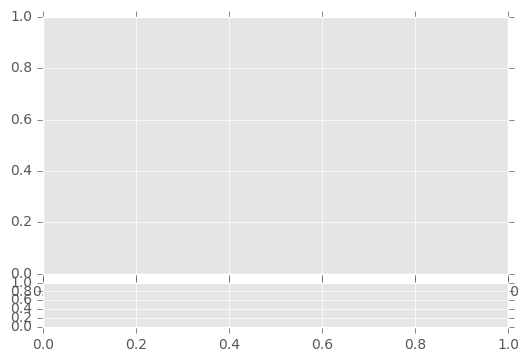

In [14]:
## parameters---- (6,1) is the grid with 6 rows and 1 col. (0,0) is the starting point. ax1 spans 5 rows and 1 column

ax1= plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2= plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

## sahrex means that the ax2 will it's x-axis to that of ax1

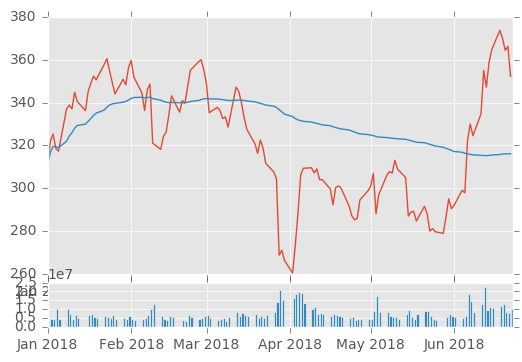

In [51]:
ax1= plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2= plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(df.index, df['High'])
ax1.plot(df.index, df['rol_mean'])
ax2.bar(df.index, df['Volume'])

plt.show()

An OHLC chart, called a candlestick chart, is a chart that condenses the open, high, low, and close data all in one nice format.
Plus it makes the graphs more colourful and pretty

In [52]:
## making candlestick graphs right from pandas is not inbuilt so we use matplotlib
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

The first import is the OHlC graph type from matplotlib and the second import is the mdates type which is the data type for matplotlib graphs

In [56]:
# the current data doesn't have olhc values so we create the OHlC data
df_ohlc = df['High'].resample('10D').ohlc()

 Since our data is daily data, resampling it to 10day data effectively shrinks the size of our data significantly. This is how you can normalize multiple datasets.

In [54]:
# re-sampling the volume column
df_vol = df['Volume'].resample('10D').sum()
## we are using sum here as we want to know the total volume of shares traded over those ten days

In [58]:
print(df_ohlc.head())

                open    high       low     close
Date                                            
2018-01-01  311.3500  338.80  311.3500  337.0000
2018-01-11  344.8099  352.30  336.2200  350.5899
2018-01-21  357.8300  360.50  344.0000  348.2700
2018-01-31  356.1900  359.66  320.9845  320.9845
2018-02-10  318.0800  343.12  318.0800  335.4900


Now we move the info to the matplotlib and convert the dates to mdates version.So we now we remove dates from the index

In [59]:
df_ohlc = df_ohlc.reset_index()

In [60]:
### converting the dates to mdates

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

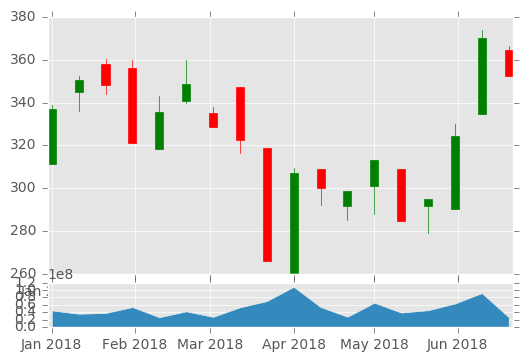

In [64]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.xaxis_date()      # converts the axis from the raw mdate numbers to dates

## graphing the candlestick graph
candlestick_ohlc(ax1, df_ohlc.values, width =3 ,colorup='g')


##  The fill_between function will graph x, y, then what to fill to/between. In this case we are chosing zero.
ax2.fill_between(df_vol.index.map(mdates.date2num),df_vol.values,0)    

In [ ]:
ca